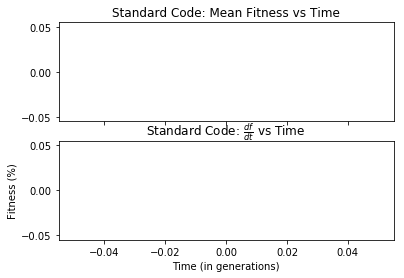

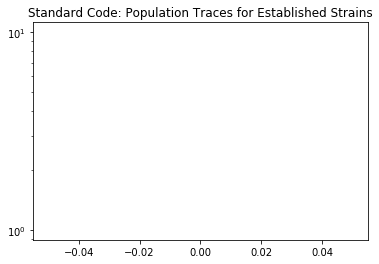

In [1]:
import numpy as np
import pandas as pd
from codonTable import codonTable
from codonUtils import utils
from codonOptimizer import tableOptimizer
from queue import Queue as queue
from random import choice
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap as LSC
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import networkx as nx
from thunderflask import thunderflask
from bacteria import strain
from tqdm import tqdm

# run several iterations
# populate sim
LUCA = strain(N_pop=1e6, fitness=0, mu=2e-5)
sim = thunderflask(LUCA)
# initialize some variables
T_curr = 0
mut_param = [2, 3.5]
dt = 1

# run simulation
#sim.simulate(1000, dt, T_curr, mut_param)
t = np.array(sim.f_trace['timepoints'])
f = np.array(sim.f_trace['fitnesses'])
fig, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(t, f)
axarr[0].set_title('Standard Code: Mean Fitness vs Time')
dt = np.diff(t)
t_avg = (t[1:]+t[:-1])/2
gradf = np.diff(f)/dt
axarr[1].plot(t_avg, gradf)
axarr[1].set_title(r'Standard Code: $\frac{df}{dt}$ vs Time')
plt.xlabel('Time (in generations)')
plt.ylabel('Fitness (%)')
plt.show()

for i, bact in enumerate(sim.estStrains):
    if i % 10 == 0:
        t = bact.timepoints
        pop = bact.poptrace
        plt.semilogy(t, pop)
plt.title('Standard Code: Population Traces for Established Strains')
plt.show()


In [2]:
table = codonTable()
table.dictToTable()

U        C        A        G
U U  UUU : F  UCU : S  UAU : Y  UGU : C
  C  UUC : F  UCC : S  UAC : Y  UGC : C
  A  UUA : L  UCA : S  UAA : *  UGA : *
  G  UUG : L  UCG : S  UAG : *  UGG : W
C U  CUU : L  CCU : P  CAU : H  CGU : R
  C  CUC : L  CCC : P  CAC : H  CGC : R
  A  CUA : L  CCA : P  CAA : Q  CGA : R
  G  CUG : L  CCG : P  CAG : Q  CGG : R
A U  AUU : I  ACU : T  AAU : N  AGU : S
  C  AUC : I  ACC : T  AAC : N  AGC : S
  A  AUA : I  ACA : T  AAA : K  AGA : R
  G  AUG : M  ACG : T  AAG : K  AGG : R
G U  GUU : V  GCU : A  GAU : D  GGU : G
  C  GUC : V  GCC : A  GAC : D  GGC : G
  A  GUA : V  GCA : A  GAA : E  GGA : G
  G  GUG : V  GCG : A  GAG : E  GGG : G

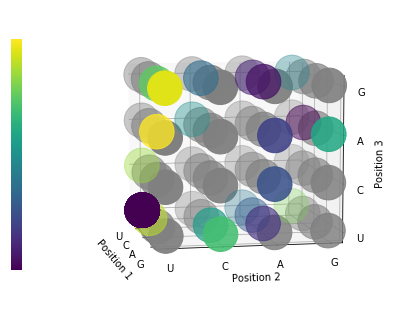

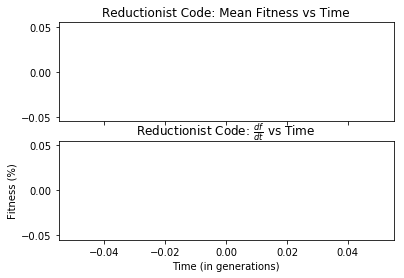

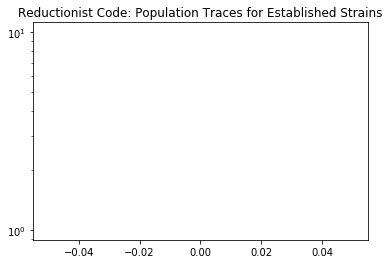

In [3]:
import numpy as np
import pandas as pd
from codonTable import codonTable
from codonUtils import utils
from codonOptimizer import tableOptimizer
from queue import Queue as queue
from random import choice
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap as LSC
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from thunderflask import thunderflask
from bacteria import strain
from tqdm import tqdm
table = codonTable()
newTable = table.codonDict
newTable['UUU'] = '*'
newTable['UUA'] = '*'
newTable['UUG'] = '*'
newTable['UCU'] = '*'
newTable['UCC'] = '*'
newTable['UCG'] = '*'
newTable['UAC'] = '*'
newTable['UGC'] = '*'
newTable['CUA'] = '*'
newTable['CUC'] = '*'
newTable['CUG'] = '*'
newTable['CCU'] = '*'
newTable['CCC'] = '*'
newTable['CCA'] = '*'
newTable['CAA'] = '*'
newTable['CAC'] = '*'
newTable['CGC'] = '*'
newTable['CGU'] = '*'
newTable['CGG'] = '*'
newTable['AUU'] = '*'
newTable['AUC'] = '*'
newTable['ACC'] = '*'
newTable['ACG'] = '*'
newTable['ACA'] = '*'
newTable['AAC'] = '*'
newTable['AAA'] = '*'
newTable['AGA'] = '*'
newTable['AGG'] = '*'
newTable['AGC'] = '*'
newTable['AGU'] = '*'
newTable['GUC'] = '*'
newTable['GUA'] = '*'
newTable['GUU'] = '*'
newTable['GCC'] = '*'
newTable['GCG'] = '*'
newTable['GCA'] = '*'
newTable['GAU'] = '*'
newTable['GAG'] = '*'
newTable['GGG'] = '*'
newTable['GGU'] = '*'
newTable['GGC'] = '*'
tableObj = codonTable(table=newTable)
#table.dictToGraph()
#utils.getAAcounts(newTable)
#utils.getCodonConnectivity(newTable)
#utils.getResiConnectivity(newTable)
table.plot3d()
# populate sim with a reductionist organism
LUCA = strain(N_pop=1e6, table=newTable, fitness=0, mu=2e-5)
sim = thunderflask(LUCA)
# initialize some variables
T_curr = 0
mut_param = [2, 3.5]
dt = 1

# run simulation
#sim.simulate(300, dt, T_curr, mut_param)
t = np.array(sim.f_trace['timepoints'])
f = np.array(sim.f_trace['fitnesses'])
fig, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(t, f)
axarr[0].set_title('Reductionist Code: Mean Fitness vs Time')
dt = np.diff(t)
t_avg = (t[1:]+t[:-1])/2
gradf = np.diff(f)/dt
axarr[1].plot(t_avg, gradf)
axarr[1].set_title(r'Reductionist Code: $\frac{df}{dt}$ vs Time')
plt.xlabel('Time (in generations)')
plt.ylabel('Fitness (%)')
plt.show()

for i, bact in enumerate(sim.estStrains):
    if i % 10 == 0:
        t = bact.timepoints
        pop = bact.poptrace
        plt.semilogy(t, pop)
plt.title('Reductionist Code: Population Traces for Established Strains')
plt.show()

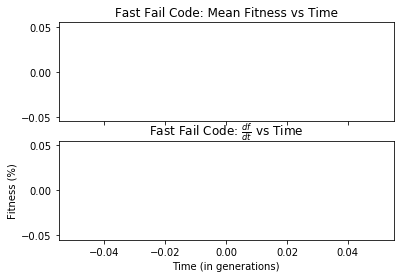

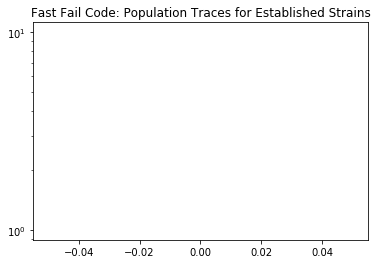

In [4]:
from ffgen import ffgen
# populate sim with a fast fail organism
table = ffgen.triplet()
LUCA = strain(N_pop=1e6, table=table, fitness=0, mu=2e-5)
sim = thunderflask(LUCA)
# initialize some variables
T_curr = 0
mut_param = [2, 3.5]
dt = 1

# run simulation
#sim.simulate(300, dt, T_curr, mut_param)
t = np.array(sim.f_trace['timepoints'])
f = np.array(sim.f_trace['fitnesses'])
fig, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(t, f)
axarr[0].set_title('Fast Fail Code: Mean Fitness vs Time')
dt = np.diff(t)
t_avg = (t[1:]+t[:-1])/2
gradf = np.diff(f)/dt
axarr[1].plot(t_avg, gradf)
axarr[1].set_title(r'Fast Fail Code: $\frac{df}{dt}$ vs Time')
plt.xlabel('Time (in generations)')
plt.ylabel('Fitness (%)')
plt.show()

for i, bact in enumerate(sim.estStrains):
    # if i % 10 == 0:
    t = bact.timepoints
    pop = bact.poptrace
    plt.semilogy(t, pop)
plt.title('Fast Fail Code: Population Traces for Established Strains')
plt.show()


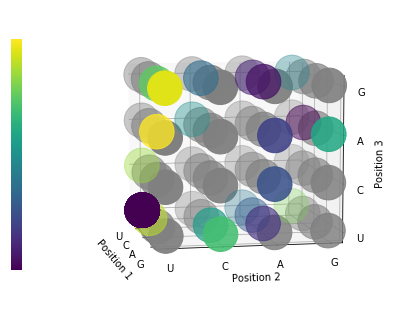

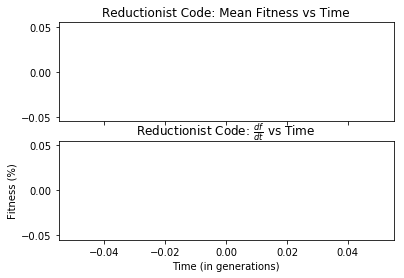

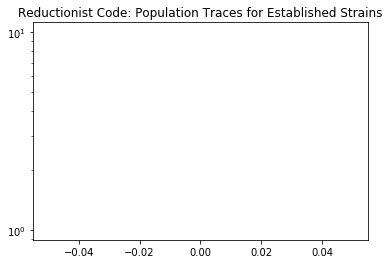

In [5]:
import numpy as np
import pandas as pd
from codonTable import codonTable
from codonUtils import utils
from codonOptimizer import tableOptimizer
from queue import Queue as queue
from random import choice
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap as LSC
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from thunderflask import thunderflask
from bacteria import strain
from tqdm import tqdm
table = codonTable()
newTable = table.codonDict
newTable['UUU'] = '*'
newTable['UUA'] = '*'
newTable['UUG'] = '*'
newTable['UCU'] = '*'
newTable['UCC'] = '*'
newTable['UCG'] = '*'
newTable['UAC'] = '*'
newTable['UGC'] = '*'
newTable['CUA'] = '*'
newTable['CUC'] = '*'
newTable['CUG'] = '*'
newTable['CCU'] = '*'
newTable['CCC'] = '*'
newTable['CCA'] = '*'
newTable['CAA'] = '*'
newTable['CAC'] = '*'
newTable['CGC'] = '*'
newTable['CGU'] = '*'
newTable['CGG'] = '*'
newTable['AUU'] = '*'
newTable['AUC'] = '*'
newTable['ACC'] = '*'
newTable['ACG'] = '*'
newTable['ACA'] = '*'
newTable['AAC'] = '*'
newTable['AAA'] = '*'
newTable['AGA'] = '*'
newTable['AGG'] = '*'
newTable['AGC'] = '*'
newTable['AGU'] = '*'
newTable['GUC'] = '*'
newTable['GUA'] = '*'
newTable['GUU'] = '*'
newTable['GCC'] = '*'
newTable['GCG'] = '*'
newTable['GCA'] = '*'
newTable['GAU'] = '*'
newTable['GAG'] = '*'
newTable['GGG'] = '*'
newTable['GGU'] = '*'
newTable['GGC'] = '*'
tableObj = codonTable(table=newTable)
#table.dictToGraph()
#utils.getAAcounts(newTable)
#utils.getCodonConnectivity(newTable)
#utils.getResiConnectivity(newTable)
table.plot3d()
# populate sim with a reductionist organism
LUCA = strain(N_pop=1e6, table=tableObj, fitness=0, mu=2e-5)
sim = thunderflask(LUCA)
# initialize some variables
T_curr = 0
mut_param = [2, 3.5]
dt = 1

# run simulation
#sim.simulate(300, dt, T_curr, mut_param)
t = np.array(sim.f_trace['timepoints'])
f = np.array(sim.f_trace['fitnesses'])
fig, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(t, f)
axarr[0].set_title('Reductionist Code: Mean Fitness vs Time')
dt = np.diff(t)
t_avg = (t[1:]+t[:-1])/2
gradf = np.diff(f)/dt
axarr[1].plot(t_avg, gradf)
axarr[1].set_title(r'Reductionist Code: $\frac{df}{dt}$ vs Time')
plt.xlabel('Time (in generations)')
plt.ylabel('Fitness (%)')
plt.show()

for i, bact in enumerate(sim.estStrains):
    if i % 10 == 0:
        t = bact.timepoints
        pop = bact.poptrace
        plt.semilogy(t, pop)
plt.title('Reductionist Code: Population Traces for Established Strains')
plt.show()

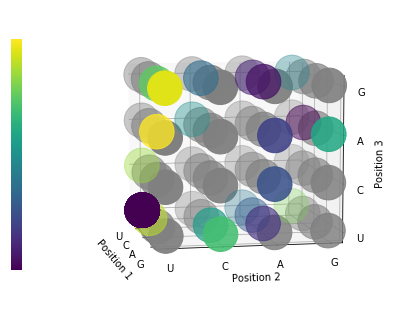

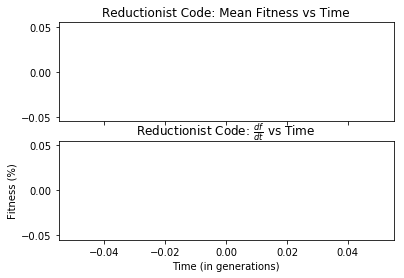

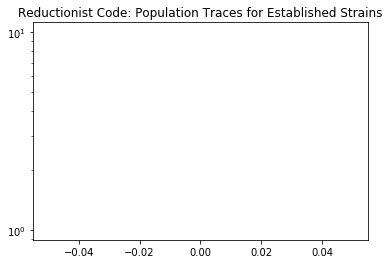

In [6]:
import numpy as np
import pandas as pd
from codonTable import codonTable
from codonUtils import utils
from codonOptimizer import tableOptimizer
from queue import Queue as queue
from random import choice
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap as LSC
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from thunderflask import thunderflask
from bacteria import strain
from tqdm import tqdm
table = codonTable()
newTable = table.codonDict
newTable['UUU'] = '*'
newTable['UUA'] = '*'
newTable['UUG'] = '*'
newTable['UCU'] = '*'
newTable['UCC'] = '*'
newTable['UCG'] = '*'
newTable['UAC'] = '*'
newTable['UGC'] = '*'
newTable['CUA'] = '*'
newTable['CUC'] = '*'
newTable['CUG'] = '*'
newTable['CCU'] = '*'
newTable['CCC'] = '*'
newTable['CCA'] = '*'
newTable['CAA'] = '*'
newTable['CAC'] = '*'
newTable['CGC'] = '*'
newTable['CGU'] = '*'
newTable['CGG'] = '*'
newTable['AUU'] = '*'
newTable['AUC'] = '*'
newTable['ACC'] = '*'
newTable['ACG'] = '*'
newTable['ACA'] = '*'
newTable['AAC'] = '*'
newTable['AAA'] = '*'
newTable['AGA'] = '*'
newTable['AGG'] = '*'
newTable['AGC'] = '*'
newTable['AGU'] = '*'
newTable['GUC'] = '*'
newTable['GUA'] = '*'
newTable['GUU'] = '*'
newTable['GCC'] = '*'
newTable['GCG'] = '*'
newTable['GCA'] = '*'
newTable['GAU'] = '*'
newTable['GAG'] = '*'
newTable['GGG'] = '*'
newTable['GGU'] = '*'
newTable['GGC'] = '*'
tableObj = codonTable(table=newTable)
#table.dictToGraph()
#utils.getAAcounts(newTable)
#utils.getCodonConnectivity(newTable)
#utils.getResiConnectivity(newTable)
table.plot3d()
# populate sim with a reductionist organism
LUCA = strain(N_pop=1e6, table=tableObj, fitness=0, mu=2e-5)
sim = thunderflask(LUCA)
# initialize some variables
T_curr = 0
mut_param = [2, 3.5]
dt = 1

# run simulation
#sim.simulate(300, dt, T_curr, mut_param)
t = np.array(sim.f_trace['timepoints'])
f = np.array(sim.f_trace['fitnesses'])
fig, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(t, f)
axarr[0].set_title('Reductionist Code: Mean Fitness vs Time')
dt = np.diff(t)
t_avg = (t[1:]+t[:-1])/2
gradf = np.diff(f)/dt
axarr[1].plot(t_avg, gradf)
axarr[1].set_title(r'Reductionist Code: $\frac{df}{dt}$ vs Time')
plt.xlabel('Time (in generations)')
plt.ylabel('Fitness (%)')
plt.show()

for i, bact in enumerate(sim.estStrains):
    if i % 10 == 0:
        t = bact.timepoints
        pop = bact.poptrace
        plt.semilogy(t, pop)
plt.title('Reductionist Code: Population Traces for Established Strains')
plt.show()

In [34]:
tableObj.plotGraph()

ValueError: c of shape (21, 1) not acceptable as a color sequence for x with size 21, y with size 21

In [35]:
table

In [36]:
table.plotGraph()

ValueError: c of shape (21, 1) not acceptable as a color sequence for x with size 21, y with size 21

In [28]:
import numpy as np
import pandas as pd
from codonTable import codonTable
from codonUtils import utils
from codonOptimizer import tableOptimizer
from queue import Queue as queue
from random import choice
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap as LSC
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from thunderflask import thunderflask
from bacteria import strain
from tqdm import tqdm
table = codonTable()
newTable = table.codonDict
newTable['UUU'] = '*'
newTable['UUA'] = '*'
newTable['UUG'] = '*'
newTable['UCU'] = '*'
newTable['UCC'] = '*'
newTable['UCG'] = '*'
newTable['UAC'] = '*'
newTable['UGC'] = '*'
newTable['CUA'] = '*'
newTable['CUC'] = '*'
newTable['CUG'] = '*'
newTable['CCU'] = '*'
newTable['CCC'] = '*'
newTable['CCA'] = '*'
newTable['CAA'] = '*'
newTable['CAC'] = '*'
newTable['CGC'] = '*'
newTable['CGU'] = '*'
newTable['CGG'] = '*'
newTable['AUU'] = '*'
newTable['AUC'] = '*'
newTable['ACC'] = '*'
newTable['ACG'] = '*'
newTable['ACA'] = '*'
newTable['AAC'] = '*'
newTable['AAA'] = '*'
newTable['AGA'] = '*'
newTable['AGG'] = '*'
newTable['AGC'] = '*'
newTable['AGU'] = '*'
newTable['GUC'] = '*'
newTable['GUA'] = '*'
newTable['GUU'] = '*'
newTable['GCC'] = '*'
newTable['GCG'] = '*'
newTable['GCA'] = '*'
newTable['GAU'] = '*'
newTable['GAG'] = '*'
newTable['GGG'] = '*'
newTable['GGU'] = '*'
newTable['GGC'] = '*'
tableObj = codonTable(table=newTable)
fig2 = tableObj.plotGraph('tableObj: Node Color=Residue Degeneracy', nodeSize='count',nodeColor ='kd')
#table.dictToGraph()
#utils.getAAcounts(newTable)
#utils.getCodonConnectivity(newTable)
#utils.getResiConnectivity(newTable)

ValueError: c of shape (21, 1) not acceptable as a color sequence for x with size 21, y with size 21

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [9]:
# import datafiles
with open('res/2-14 Traces/2-15_Standard Code_favg_traces_T=1000_N=10_b=2_l=3.5.pickle', 'rb') as handle:
    standard_df = pickle.load(handle)
    
with open('res/2-14 Traces/2-15_Fast Fail_favg_traces_T=1000_N=10_b=2_l=3.5.pickle', 'rb') as handle:
    fastfail_df = pickle.load(handle)

/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


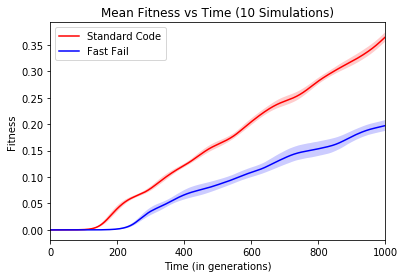

In [10]:
ax1 = sns.tsplot(data=standard_df, time='time', value='value', unit='sim', condition='code', color='red')
ax2 = sns.tsplot(data=fastfail_df, time='time', value='value', unit='sim', condition='code', color='blue')
plt.legend()
plt.title('Mean Fitness vs Time (10 Simulations)')
plt.xlabel('Time (in generations)')
plt.ylabel('Fitness')
plt.savefig('res/2-15_F_avg_T=1000_b=2_l=3-5.pdf', bbox_inches='tight')
plt.show()

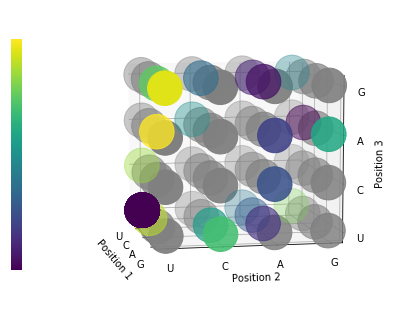

Iteration Number: 100%|██████████| 1000/1000 [04:18<00:00,  3.87it/s]


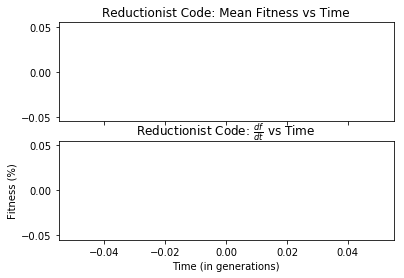

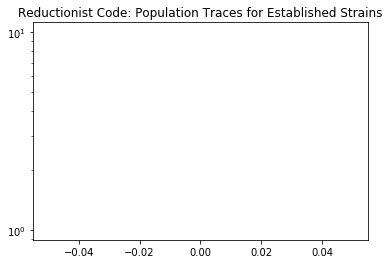

In [12]:
import numpy as np
import pandas as pd
from codonTable import codonTable
from codonUtils import utils
from codonOptimizer import tableOptimizer
from queue import Queue as queue
from random import choice
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap as LSC
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from thunderflask import thunderflask
from bacteria import strain
from tqdm import tqdm
table = codonTable()
newTable = table.codonDict
newTable['UUU'] = '*'
newTable['UUA'] = '*'
newTable['UUG'] = '*'
newTable['UCU'] = '*'
newTable['UCC'] = '*'
newTable['UCG'] = '*'
newTable['UAC'] = '*'
newTable['UGC'] = '*'
newTable['CUA'] = '*'
newTable['CUC'] = '*'
newTable['CUG'] = '*'
newTable['CCU'] = '*'
newTable['CCC'] = '*'
newTable['CCA'] = '*'
newTable['CAA'] = '*'
newTable['CAC'] = '*'
newTable['CGC'] = '*'
newTable['CGU'] = '*'
newTable['CGG'] = '*'
newTable['AUU'] = '*'
newTable['AUC'] = '*'
newTable['ACC'] = '*'
newTable['ACG'] = '*'
newTable['ACA'] = '*'
newTable['AAC'] = '*'
newTable['AAA'] = '*'
newTable['AGA'] = '*'
newTable['AGG'] = '*'
newTable['AGC'] = '*'
newTable['AGU'] = '*'
newTable['GUC'] = '*'
newTable['GUA'] = '*'
newTable['GUU'] = '*'
newTable['GCC'] = '*'
newTable['GCG'] = '*'
newTable['GCA'] = '*'
newTable['GAU'] = '*'
newTable['GAG'] = '*'
newTable['GGG'] = '*'
newTable['GGU'] = '*'
newTable['GGC'] = '*'
tableObj = codonTable(table=newTable)
#table.dictToGraph()
#utils.getAAcounts(newTable)
#utils.getCodonConnectivity(newTable)
#utils.getResiConnectivity(newTable)
#table.plot3d()
table.plot3d()
# populate sim
LUCA = strain(N_pop=1e6, table=tableObj, fitness=0, mu=2e-5)
reductionistSim = thunderflask(LUCA)
# initialize some variables
T_curr = 0
mut_param = [2, 3.5]
dt = 1

#profile sim
#cProfile.run('reductionistSim.simulate(300, dt, T_curr, mut_param, save_all=True, prune_strains=False)')

# run simulation
reductionistSim.simulate(1000, dt, T_curr, mut_param, save_all=True, prune_strains=True)
t = np.array(sim.f_trace['timepoints'])
f = np.array(sim.f_trace['fitnesses'])
fig, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(t, f)
axarr[0].set_title('Reductionist Code: Mean Fitness vs Time')
dt = np.diff(t)
t_avg = (t[1:]+t[:-1])/2
gradf = np.diff(f)/dt
axarr[1].plot(t_avg, gradf)
axarr[1].set_title(r'Reductionist Code: $\frac{df}{dt}$ vs Time')
plt.xlabel('Time (in generations)')
plt.ylabel('Fitness (%)')
plt.show()

for i, bact in enumerate(sim.estStrains):
    # if i % 10 == 0:
    t = bact.timepoints
    pop = bact.poptrace
    plt.semilogy(t, pop)
plt.title('Reductionist Code: Population Traces for Established Strains')
plt.show()

Iteration Number: 100%|██████████| 1000/1000 [08:09<00:00,  2.04it/s]


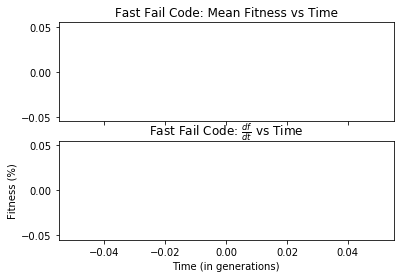

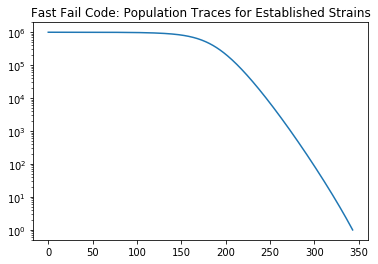

In [13]:
from ffgen import ffgen
# populate sim with a fast fail organism
table = ffgen.triplet()
LUCA = strain(N_pop=1e6, table=table, fitness=0, mu=2e-5)
sim = thunderflask(LUCA)
# initialize some variables
T_curr = 0
mut_param = [2, 3.5]
dt = 1

# run simulation
sim.simulate(1000, dt, T_curr, mut_param, save_all=True, prune_strains=True)
t = np.array(sim.f_trace['timepoints'])
f = np.array(sim.f_trace['fitnesses'])
fig, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(t, f)
axarr[0].set_title('Fast Fail Code: Mean Fitness vs Time')
dt = np.diff(t)
t_avg = (t[1:]+t[:-1])/2
gradf = np.diff(f)/dt
axarr[1].plot(t_avg, gradf)
axarr[1].set_title(r'Fast Fail Code: $\frac{df}{dt}$ vs Time')
plt.xlabel('Time (in generations)')
plt.ylabel('Fitness (%)')
plt.show()

for i, bact in enumerate(sim.estStrains):
    # if i % 10 == 0:
    t = bact.timepoints
    pop = bact.poptrace
    plt.semilogy(t, pop)
plt.title('Fast Fail Code: Population Traces for Established Strains')
plt.show()


Iteration Number: 100%|██████████| 1000/1000 [04:26<00:00,  3.75it/s]


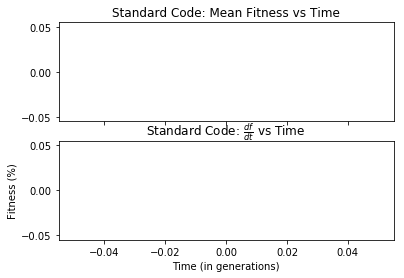

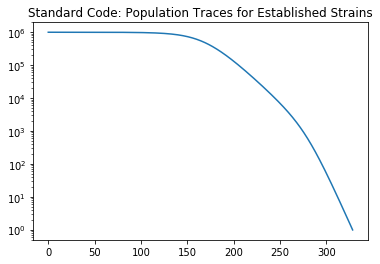

In [14]:

# run several iterations
# populate sim
LUCA = strain(N_pop=1e6, fitness=0, mu=2e-5)
sim = thunderflask(LUCA)
# initialize some variables
T_curr = 0
mut_param = [2, 3.5]
dt = 1

# run simulation
sim.simulate(1000, dt, T_curr, mut_param, save_all=True, prune_strains=True)
t = np.array(sim.f_trace['timepoints'])
f = np.array(sim.f_trace['fitnesses'])
fig, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(t, f)
axarr[0].set_title('Standard Code: Mean Fitness vs Time')
dt = np.diff(t)
t_avg = (t[1:]+t[:-1])/2
gradf = np.diff(f)/dt
axarr[1].plot(t_avg, gradf)
axarr[1].set_title(r'Standard Code: $\frac{df}{dt}$ vs Time')
plt.xlabel('Time (in generations)')
plt.ylabel('Fitness (%)')
plt.show()

for i, bact in enumerate(sim.estStrains):
    if i % 10 == 0:
        t = bact.timepoints
        pop = bact.poptrace
        plt.semilogy(t, pop)
plt.title('Standard Code: Population Traces for Established Strains')
plt.show()

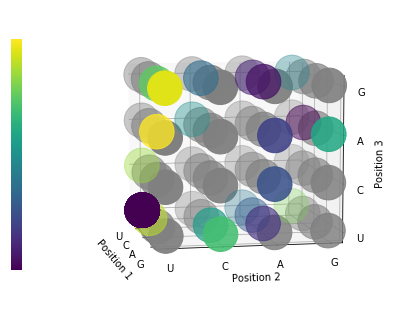

Iteration Number: 100%|██████████| 1000/1000 [00:16<00:00, 62.05it/s]


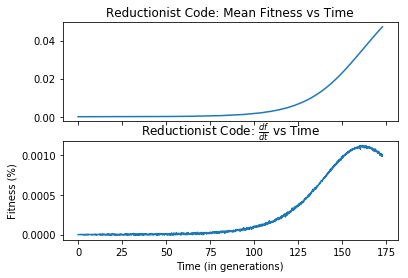

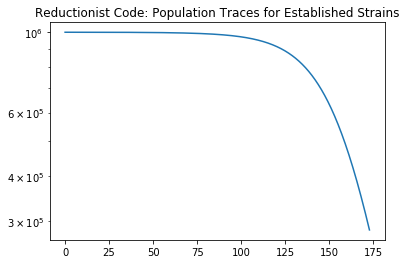

In [27]:
table = codonTable()
newTable = table.codonDict
newTable['UUU'] = '*'
newTable['UUA'] = '*'
newTable['UUG'] = '*'
newTable['UCU'] = '*'
newTable['UCC'] = '*'
newTable['UCG'] = '*'
newTable['UAC'] = '*'
newTable['UGC'] = '*'
newTable['CUA'] = '*'
newTable['CUC'] = '*'
newTable['CUG'] = '*'
newTable['CCU'] = '*'
newTable['CCC'] = '*'
newTable['CCA'] = '*'
newTable['CAA'] = '*'
newTable['CAC'] = '*'
newTable['CGC'] = '*'
newTable['CGU'] = '*'
newTable['CGG'] = '*'
newTable['AUU'] = '*'
newTable['AUC'] = '*'
newTable['ACC'] = '*'
newTable['ACG'] = '*'
newTable['ACA'] = '*'
newTable['AAC'] = '*'
newTable['AAA'] = '*'
newTable['AGA'] = '*'
newTable['AGG'] = '*'
newTable['AGC'] = '*'
newTable['AGU'] = '*'
newTable['GUC'] = '*'
newTable['GUA'] = '*'
newTable['GUU'] = '*'
newTable['GCC'] = '*'
newTable['GCG'] = '*'
newTable['GCA'] = '*'
newTable['GAU'] = '*'
newTable['GAG'] = '*'
newTable['GGG'] = '*'
newTable['GGU'] = '*'
newTable['GGC'] = '*'
tableObj = codonTable(table=newTable)
#table.dictToGraph()
#utils.getAAcounts(newTable)
#utils.getCodonConnectivity(newTable)
#utils.getResiConnectivity(newTable)
#table.plot3d()
table.plot3d()
# populate sim
LUCA = strain(N_pop=1e6, table=tableObj, fitness=0, mu=2e-5)
reductionistSim = thunderflask(LUCA)
# initialize some variables
T_curr = 0
mut_param = [2, 3.5]
dt = 0.1

#profile sim
#cProfile.run('reductionistSim.simulate(300, dt, T_curr, mut_param, save_all=True, prune_strains=False)')

# run simulation
reductionistSim.simulate(100, dt, T_curr, mut_param, save_all=True, prune_strains=False)
t = np.array(sim.f_avgtrace['timepoints'])
f = np.array(sim.f_avgtrace['f_avg'])
fig, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(t, f)
axarr[0].set_title('Reductionist Code: Mean Fitness vs Time')
dt = np.diff(t)
t_avg = (t[1:]+t[:-1])/2
gradf = np.diff(f)/dt
axarr[1].plot(t_avg, gradf)
axarr[1].set_title(r'Reductionist Code: $\frac{df}{dt}$ vs Time')
plt.xlabel('Time (in generations)')
plt.ylabel('Fitness (%)')
plt.show()

for i, bact in enumerate(sim.estStrains):
    # if i % 10 == 0:
    t = bact.timepoints
    pop = bact.poptrace
    plt.semilogy(t, pop)
plt.title('Reductionist Code: Population Traces for Established Strains')
plt.show()

In [ ]:
from ffgen import ffgen
# populate sim with a fast fail organism
table = ffgen.triplet()
LUCA = strain(N_pop=1e6, table=table, fitness=0, mu=2e-5)
sim = thunderflask(LUCA)
# initialize some variables
T_curr = 0
mut_param = [2, 3.5]
dt = 0.1

# run simulation
sim.simulate(1000, dt, T_curr, mut_param, save_all=True, prune_strains=True)
t = np.array(sim.f_avgtrace['timepoints'])
f = np.array(sim.f_avgtrace['fitnesses'])
fig, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(t, f)
axarr[0].set_title('Fast Fail Code: Mean Fitness vs Time')
dt = np.diff(t)
t_avg = (t[1:]+t[:-1])/2
gradf = np.diff(f)/dt
axarr[1].plot(t_avg, gradf)
axarr[1].set_title(r'Fast Fail Code: $\frac{df}{dt}$ vs Time')
plt.xlabel('Time (in generations)')
plt.ylabel('Fitness (%)')
plt.show()

for i, bact in enumerate(sim.estStrains):
    # if i % 10 == 0:
    t = bact.timepoints
    pop = bact.poptrace
    plt.semilogy(t, pop)
plt.title('Fast Fail Code: Population Traces for Established Strains')
plt.show()


In [ ]:
# run several iterations
# populate sim
LUCA = strain(N_pop=1e6, fitness=0, mu=2e-5)
sim = thunderflask(LUCA)
# initialize some variables
T_curr = 0
mut_param = [2, 3.5]
dt = 1

# run simulation
sim.simulate(1000, dt, T_curr, mut_param, save_all=True, prune_strains=True)
t = np.array(sim.f_avgtrace['timepoints'])
f = np.array(sim.f_avgtrace['fitnesses'])
fig, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(t, f)
axarr[0].set_title('Standard Code: Mean Fitness vs Time')
dt = np.diff(t)
t_avg = (t[1:]+t[:-1])/2
gradf = np.diff(f)/dt
axarr[1].plot(t_avg, gradf)
axarr[1].set_title(r'Standard Code: $\frac{df}{dt}$ vs Time')
plt.xlabel('Time (in generations)')
plt.ylabel('Fitness (%)')
plt.show()

for i, bact in enumerate(sim.estStrains):
    if i % 10 == 0:
        t = bact.timepoints
        pop = bact.poptrace
        plt.semilogy(t, pop)
plt.title('Standard Code: Population Traces for Established Strains')
plt.show()

In [ ]:
import numpy as np
from scipy.interpolate import interp1d as interp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm
from thunderflask import thunderflask
from bacteria import strain
from ffgen import ffgen
from codonTable import codonTable
from codonUtils import utils
from bacteria import strain

# get appropriate table
table = {
    'Standard Code' : utils.standardTable,
    'Fast Fail' : ffgen.triplet(),
    'Colorado' : utils.coloradoTable
}
# initialize some variables
T_curr = 0
mut_param = [0.5, 0.33]
dt = 0.1
N_sims = 1
T_sim = 1000
t_extra = 5
date = '2-21'
code = 'Fast Fail'
filepath = 'res/2-14 Traces'
filename = '{0}_{1}_favg_traces_T={2}_N={3}_b={4}_l={5}.pickle'.format(date,
                                                                       code,
                                                                       T_sim,
                                                                       N_sims,
                                                                      mut_param[0],
                                                                      mut_param[1]) 
# initialize list of dictionaries of arrays (i know, it's too much) 
dataframes = []
newtimes = np.linspace(0, T_sim, int((T_sim)/dt))
# run N simulations
for i in tqdm(range(N_sims), desc='Simulation Number: '):
    LUCA = strain(N_pop=1e6, table=table[code], fitness=0, mu=2e-5)
    sim = thunderflask(LUCA)
    sim.simulate(T_sim+t_extra, dt, T_curr, mut_param)
    t = sim.f_avgtrace['timepoints']
    f_avg = sim.f_avgtrace['f_avg']
    interp_fxn = interp(t, f_avg)
    newf = interp_fxn(newtimes)
    df = pd.DataFrame({
        'time' : newtimes, 
        'value' : newf, 
        'sim' : [i for j in range(len(newf))],
        'code' : [code for j in range(len(newf))]
    })
    dataframes.append(df)
# package data into pandas dataframe
df_sc = pd.concat(dataframes)
# plot results
ax = sns.tsplot(data=df_sc, time='time', value='value', unit='sim')
plt.title('{0}: <F> vs time ({1} Replicates)'.format(code, N_sims))
plt.xlabel('Time (in generations)')
plt.ylabel('Mean Fitness')
plt.show()
print('done')
# fig, axarr = plt.subplots(2, sharex=True)
# axarr[0].plot(t, f)
# axarr[0].set_title('Fast Fail Code: Mean Fitness vs Time')
# dt = np.diff(t)
# t_avg = (t[1:]+t[:-1])/2
# gradf = np.diff(f)/dt
# axarr[1].plot(t_avg, gradf)
# axarr[1].set_title(r'Fast Fail Code: $\frac{df}{dt}$ vs Time')
# plt.xlabel('Time (in generations)')
# plt.ylabel('Fitness (%)')
# plt.show()